In [4]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import matplotlib.cm as cm
from sklearn import (manifold, datasets, decomposition, ensemble,
                    discriminant_analysis, random_projection, neighbors)

print(__doc__)

Automatically created module for IPython interactive environment


In [20]:
digits = datasets.load_digits(n_class=6)

X = digits.data
y = digits.target
n_sample, n_feature = X.shape
"""
This code is based on a dataset like n_sample dot n_feature aka n*p
"""
n_neighbors = 30

In [26]:
# Scale and Visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                color=plt.cm.Set1(y[i]/10.),
                fontdict={'weight': 'bold', 'size':9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(X.shape[0]):
            dist = np.sum((X[i]-shown_images)**2, 1)
            if np.min(dist) < 4e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

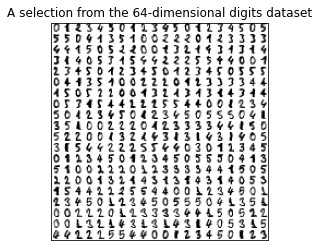

In [22]:
# Plottign images of the digits
n_img_per_row = 20
img = np.zeros((10*n_img_per_row, 10*n_img_per_row))
for i in range(n_img_per_row):
    ix = 10*i +1
    for j in range(n_img_per_row):
        iy = 10*j +1
        img[ix:ix+8, iy:iy+8] = X[i*n_img_per_row+j].reshape((8, 8))
        
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

Computing random projection


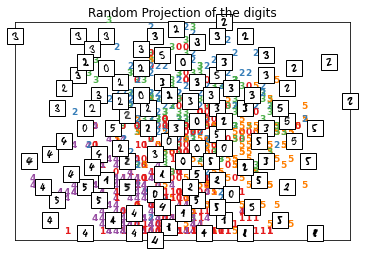

Computing PCA projection


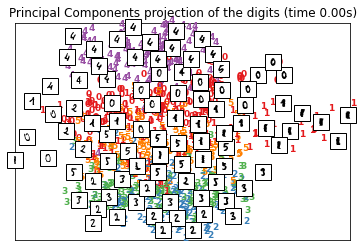

Computing Isomap projection of hte digits dataset
Done.


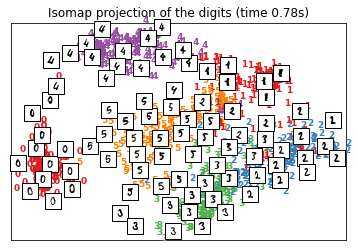

Computing the LLE mbedding


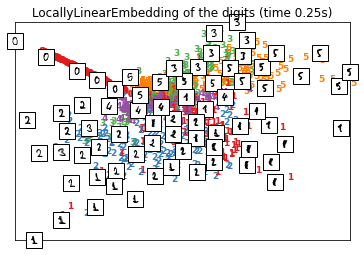

Computing MDS embedding


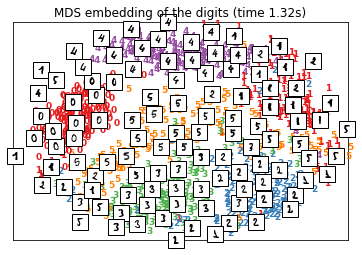

In [27]:
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")

# Projection onto the first 2 principal components
print('Computing PCA projection')
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca, "Principal Components projection of the digits (time %.2fs)"%(time()-t0))

# Projection onto the first 2 linear discriminant components

"""
Isomap
"""
print("Computing Isomap projection of the digits dataset")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso, "Isomap projection of the digits (time %.2fs)"%(time()-t0))

"""
Locally Linear Embedding of the digits datasets
"""
print('Computing the LLE mbedding')
clf = manifold.LocallyLinearEmbedding(n_neighbors = n_neighbors, n_components=2, method='standard')

t0 = time()
X_lle = clf.fit_transform(X)
plot_embedding(X_lle, 'LocallyLinearEmbedding of the digits (time %.2fs)'%(time()-t0))

# MDS embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
plot_embedding(X_mds, 'MDS embedding of the digits (time %.2fs)'%(time()-t0))